About Data

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid", context = 'notebook', palette = 'deep')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
import matplotlib
matplotlib.__version__


'3.3.4'

In [3]:
%matplotlib inline

In [4]:
data_file = 'C:\\Users\\Hemant\\Documents\\GitHub\\Data-Analysis\\Datasets\\loan_data.csv'

In [5]:
loan_data = pd.read_csv(data_file)

In [6]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
# Change the columns to have _ instead of .
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [8]:
list_t = ["aaa.aa", "bbb.bb"]


In [9]:
for i in list_t:
    str(i).replace(".","_")
    

### Data Wrangling 

#### Step1 : Rename columns - from credit.policy to credit_policy etc

In [10]:
def rename_columns(a):
    list_a = list(a)
    return [str(i).replace(".","_") for i in list_a]

    

In [11]:
loan_data.columns = rename_columns(loan_data.columns)
loan_data.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [12]:
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Step2 : Taking a look at the data. 

#### 2.1 Checking the datatypes of the columns

In [13]:
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
loan_data.dtypes


credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

### Checking for missing values

In [15]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Looks like there are no missing values in the dataset. Checking on column wise data

In [16]:
loan_data["credit_policy"].value_counts(normalize = True)*100

1    80.496972
0    19.503028
Name: credit_policy, dtype: float64

80% of the applicants meet the criteria od credit underwriting by LendingClub.com and 20% of the collected data does not comply with the criteria.
For loan underwriting, the False Negatives are more critical than the false positives. Meaning to say, it is ok for the club to evaluate a potential customer as "Risky" than evaulating a true risky customer as "Safe".

Studying the 20% of the Risky cases may give further insights on the "Risky"citeria

In [17]:
#Purpose in the Rejeted case
risky_loans = loan_data[loan_data["credit_policy"]==0]
risky_loans.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1


In [18]:
risky_loans["purpose"].value_counts(normalize = True)*100

debt_consolidation    39.293362
all_other             26.552463
credit_card           12.955032
small_business         6.638116
home_improvement       6.263383
educational            4.764454
major_purchase         3.533191
Name: purpose, dtype: float64

Around 40% of risky loans are for Debt Consolidation urposes. Risk for Credit cards are at #3 with 13% of cases.
It would be interesting to see whether loan for debt consolidation are mostly risky.

In [19]:
# loan_data[loan_data["purpose"]=="debt_consolidation"]["credit_policy"].value_counts()

In [20]:
loan_data[loan_data["purpose"]=="debt_consolidation"]["credit_policy"].value_counts(normalize = True)*100

1    81.450594
0    18.549406
Name: credit_policy, dtype: float64

Just 18.5% of the debt consolidation loan applications are considered risky and still  81.5% cases are healthy loans.


We can extend this analysis to other purposes to analyse the # of risky/safe loan.

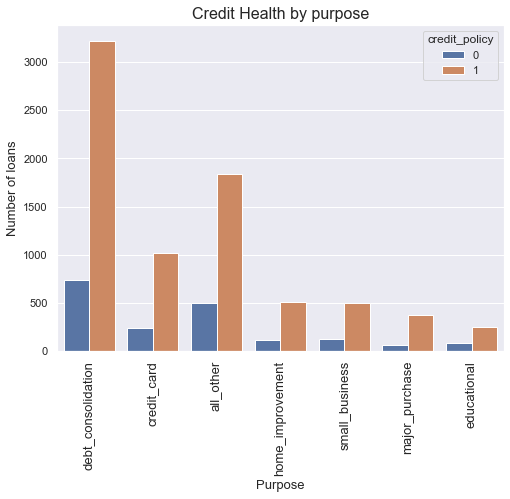

In [21]:
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(1,1,1)

sns.countplot(x = "purpose", hue = "credit_policy", data = loan_data)
plt.xticks(rotation = 90, fontsize = 13)
plt.title("Credit Health by purpose", fontsize = 16)
plt.xlabel("Purpose", fontsize = 13)
plt.ylabel("Number of loans", fontsize = 13)

plt.show()


In [22]:
# Calculating Risky/Total count of loans by purpose
tot_count_of_loans_by_purpose = loan_data.groupby(["purpose"])["credit_policy"].count().reset_index()
tot_count_of_risky_loans_by_purpose = loan_data[loan_data["credit_policy"]==0].groupby(["purpose"])["credit_policy"].count().reset_index()

risky_to_total_ratio_by_purpose = pd.merge(tot_count_of_risky_loans_by_purpose,tot_count_of_loans_by_purpose, on = 'purpose', suffixes = ('_x', '_y'))
risky_to_total_ratio_by_purpose.columns = ["purpose", "Risky","Total"]
risky_to_total_ratio_by_purpose


,purpose,Risky,Total
0,all_other,496,2331
1,credit_card,242,1262
2,debt_consolidation,734,3957
3,educational,89,343
4,home_improvement,117,629
5,major_purchase,66,437
6,small_business,124,619


In [23]:
risky_to_total_ratio_by_purpose["ratio"] = risky_to_total_ratio_by_purpose["Risky"]/risky_to_total_ratio_by_purpose["Total"]*100
risky_to_total_ratio_by_purpose.sort_values("ratio", ascending = False)

,purpose,Risky,Total,ratio
3,educational,89,343,25.947522
0,all_other,496,2331,21.278421
6,small_business,124,619,20.032310
1,credit_card,242,1262,19.175911
4,home_improvement,117,629,18.600954
2,debt_consolidation,734,3957,18.549406
5,major_purchase,66,437,15.102975


Around 26% of the Education purpose loans are termed "Risky" followed by small_businesses and all other purposes

#### Interest Rate

In [24]:
loan_data.groupby("credit_policy").agg({'int_rate':['min','max','mean']})

int_rate                  
                   min     max      mean
credit_policy                           
0                 0.06  0.2164  0.138680
1                 0.06  0.2121  0.118754

C:\Users\Hemant\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hemant\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


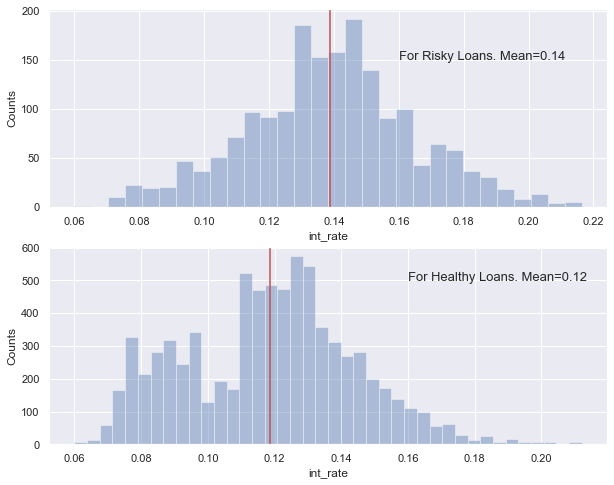

In [25]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.distplot(loan_data[loan_data["credit_policy"]==0]["int_rate"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(0.16,150,"For Risky Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==0]["int_rate"].mean(),2)), fontsize =13)


ax2 = plt.subplot(212)
sns.distplot(loan_data[loan_data["credit_policy"]==1]["int_rate"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==1]["int_rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(0.16,500,"For Healthy Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==1]["int_rate"].mean(),2)), fontsize =13)

plt.show()

The average interest rate for the Risky loans is around 2% higher than the healthy loans.

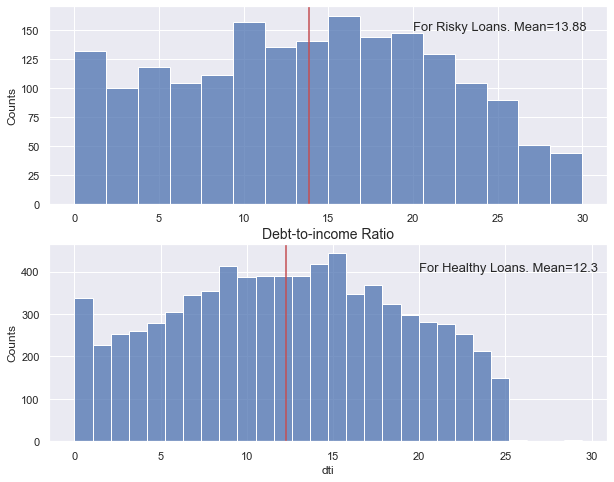

In [39]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[loan_data["credit_policy"]==0]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(20,150,"For Risky Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==0]["dti"].mean(),2)), fontsize =13)


ax2 = plt.subplot(212)
sns.histplot(loan_data[loan_data["credit_policy"]==1]["dti"], kde = False)
plt.axvline(x = loan_data[loan_data["credit_policy"]==1]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(20,400,"For Healthy Loans. Mean={}".format(round(loan_data[loan_data["credit_policy"]==1]["dti"].mean(),2)), fontsize =13)

plt.show()

The Debt to Income ratio is higher for the Risky loans. We can also check the DTI ratio for the debt_consolidation loans to assess the risk apetite

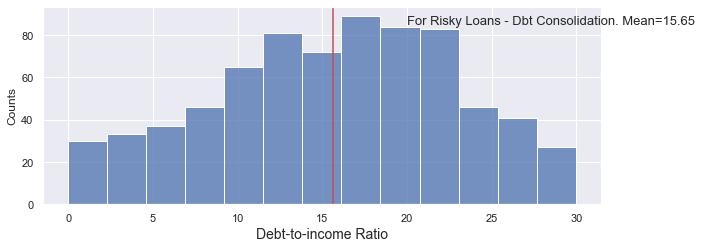

In [37]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(loan_data[(loan_data["credit_policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"], kde = False)
plt.axvline(x = loan_data[(loan_data["credit_policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(20,85,"For Risky Loans - Dbt Consolidation. Mean={}".format(round(loan_data[(loan_data["credit_policy"]==0) & (loan_data["purpose"]=="debt_consolidation")]["dti"].mean(),2)), fontsize =13)
plt.show()

In [28]:
mean_dti_by_purpose_policy= loan_data.groupby(["purpose","credit_policy"])["dti"].mean().reset_index()
mean_dti_by_purpose_policy

,purpose,credit_policy,dti
0,all_other,0,12.036190
1,all_other,1,10.820905
2,credit_card,0,15.350620
3,credit_card,1,13.802539
4,debt_consolidation,0,15.654455
5,debt_consolidation,1,13.717093
6,educational,0,11.243034
7,educational,1,11.380630
8,home_improvement,0,13.008889
9,home_improvement,1,9.555059


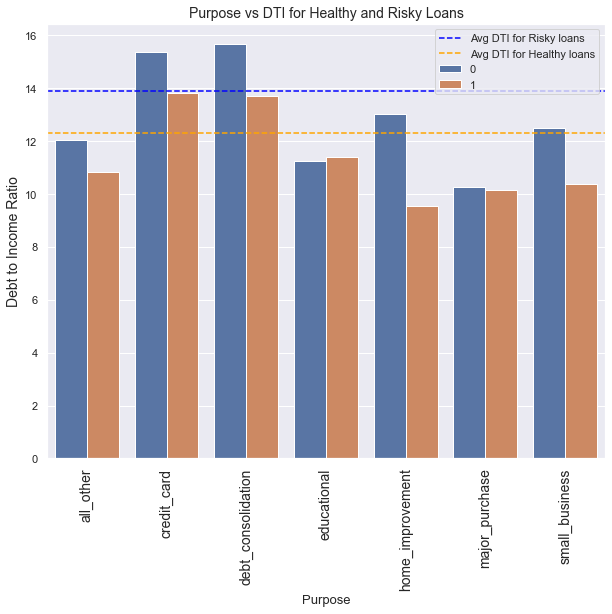

In [29]:
fig = plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)

sns.barplot(data = mean_dti_by_purpose_policy,x ="purpose" , y="dti", hue = "credit_policy")
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel("Debt to Income Ratio", fontsize = 14)
plt.xlabel("Purpose", fontsize = 13)
plt.title("Purpose vs DTI for Healthy and Risky Loans", fontsize = 14)

ax2 = ax2.twinx().twiny()
plt.axhline(y = loan_data[loan_data["credit_policy"]==0]["dti"].mean(), color = 'blue', linestyle = '--', label = "Avg DTI for Risky loans")
plt.axhline(y = loan_data[loan_data["credit_policy"]==1]["dti"].mean(), color = 'orange', linestyle = '--', label = "Avg DTI for Healthy loans")
plt.legend(loc = 1)
plt.show()

Higher the DTI ratio, higher the chances of risk. The average DTI for a healthy loan is ~12.5. However, DTI with values as low as 10.5 can also be risky. Though it does not imply that the credit policy is corelated to the DTI.

It will be interesting to check the variables that are correlated to DTI. 

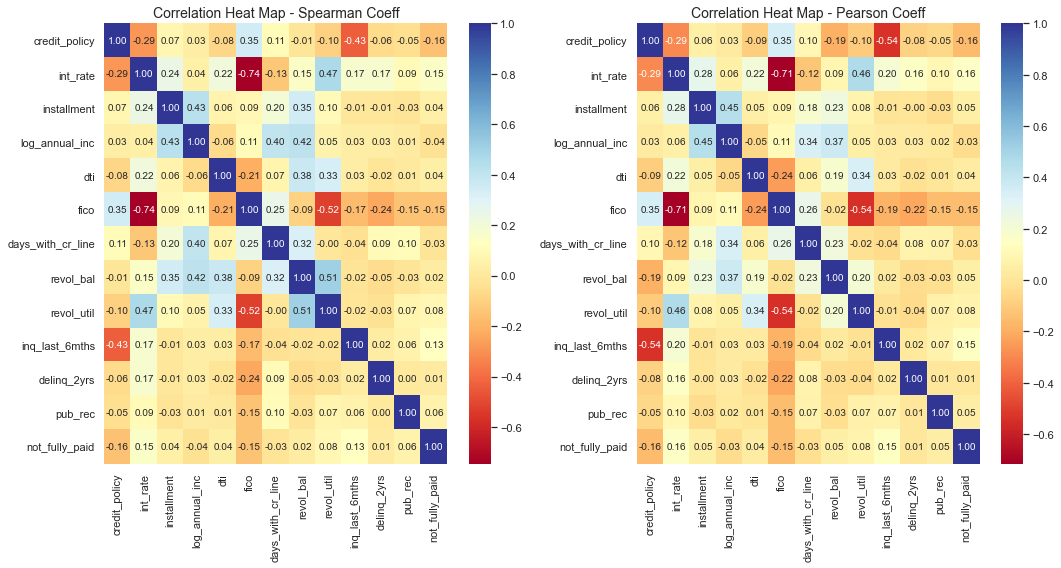

In [30]:
fig = plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
sns.heatmap(loan_data.corr('spearman'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Spearman Coeff", fontsize = 14)

ax2 = plt.subplot(122)
sns.heatmap(loan_data.corr('pearson'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize = 14)
plt.tight_layout()
plt.show()

The DTI is correlated with Revolving Balance and Revolving utilization of the credit amount(using Spearman correlation). However, DTI is onlu correlated to Revolving Utiliization with Pearson corelation coefficient. 

It will be better to determine the correct corelation alogithm to apply but looking the variation of DTI and Revol_Bal and Revol_util in a scatter plot

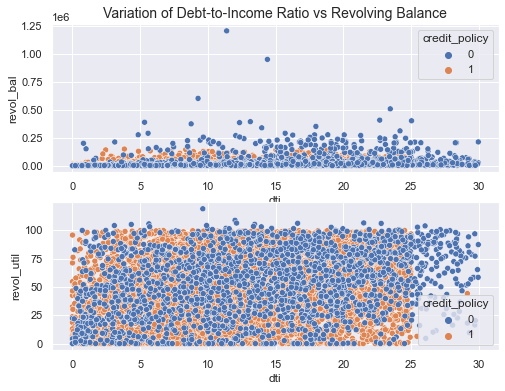

In [31]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)

plt.title("Variation of Debt-to-Income Ratio vs Revolving Balance", fontsize = 14)
sns.scatterplot(data = loan_data[["dti", "revol_bal", "revol_util","credit_policy"]], x = "dti", y = "revol_bal", hue = "credit_policy")

ax1 = plt.subplot(212)
sns.scatterplot(data = loan_data[["dti", "revol_bal", "revol_util","credit_policy"]], x = "dti", y = "revol_util", hue = "credit_policy")


plt.show()

There appears to be no corelation between DTI and Revolving Balance/Utilization. However, from the correlation coeff, it appears that the fico - Credit Scope and the interest rates are negatively correlated.

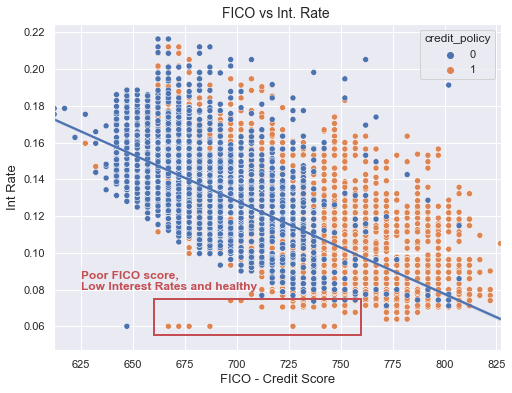

In [32]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[["fico", "int_rate","credit_policy"]], x = "fico", y = "int_rate", color = 'b', hue = "credit_policy")
sns.regplot(data = loan_data[["fico", "int_rate"]], x = "fico", y = "int_rate", color = 'b', scatter = False)
plt.title("FICO vs Int. Rate ", fontsize = 14)
plt.ylabel("Int Rate", fontsize = 13)
plt.xlabel("FICO - Credit Score", fontsize = 13)
rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
ax1.add_patch(rect)
plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

The higher the FICO score, the lower the interest rates. Also, the higher credit score have better risk credibility. However, there are a few cases where lower interest rates were offered even though the FICO score was very poor.
One possibility is if there hase been a compromise to adhere to the policy of loan disbursement and favours been granted.

For the sake of analysis, any FICO lower than 735 can be deened as poor credit score.

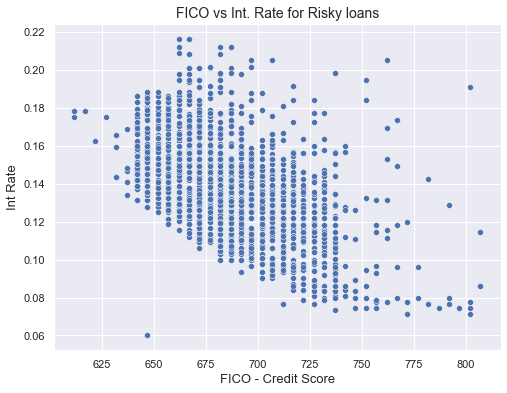

In [33]:
from matplotlib import patches
fig = plt.figure(figsize = (8,6))
ax1 = plt.subplot(111)

sns.scatterplot(data = loan_data[loan_data["credit_policy"]==0], x = "fico", y = "int_rate", color = 'b')
#sns.regplot(data = loan_data[loan_data["credit_policy"]==0], x = "fico", y = "int_rate", color = 'b', scatter = False)
plt.title("FICO vs Int. Rate for Risky loans", fontsize = 14)
plt.ylabel("Int Rate", fontsize = 13)
plt.xlabel("FICO - Credit Score", fontsize = 13)
#rect = patches.Rectangle((660,0.055),100,0.02,edgecolor = "r", fill = False, linewidth = 2)
#ax1.add_patch(rect)
#plt.text(625,0.08,"Poor FICO score,\nLow Interest Rates and healthy", fontsize = 12, color = "r", fontweight = "semibold", )
plt.show()

Identifying the loans that are termed "Healthy" in spite of having a low Credit Score and very low interest rates

In [34]:
loan_data[(loan_data["credit_policy"]==1) & ((0.05<=loan_data["int_rate"]) & (0.08>=loan_data["int_rate"]))& (loan_data["fico"]<725)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
453,1,debt_consolidation,0.0600,467.45,11.042922,15.28,687,4652.041667,26044,34.5,3,0,0,0
1031,1,credit_card,0.0600,231.03,11.184421,14.07,672,2910.000000,15885,46.9,1,1,0,0
1400,1,debt_consolidation,0.0600,216.38,10.239960,12.09,667,2550.000000,14320,67.5,1,0,0,0
2582,1,debt_consolidation,0.0800,441.84,11.050890,10.82,717,3210.000000,10513,32.0,1,0,0,0
2707,1,all_other,0.0768,374.29,11.156193,12.62,722,2911.000000,16810,32.3,2,0,0,1
2876,1,debt_consolidation,0.0768,249.53,10.819778,11.59,722,2130.000000,9287,27.9,2,0,0,0
2933,1,all_other,0.0768,187.15,12.206093,5.61,712,3840.000000,7926,49.8,3,0,0,0
2934,1,all_other,0.0800,250.69,10.520024,12.63,712,5219.958333,12269,19.3,2,0,0,0
2976,1,all_other,0.0800,250.69,11.512885,4.32,712,7109.958333,5262,28.4,0,1,0,0
3115,1,all_other,0.0768,265.13,10.257659,2.23,712,1499.958333,2204,19.2,0,0,0,0


Things to check :
Relationship of other attributes with Credit Policy